In [1]:
x = 1

In [2]:
from _generate_viz_data import _get_embeddings

import seaborn as sns
import pandas as pd

In [3]:
v0 = _get_embeddings("_io/embeddings-v0.zip", history=True)

rares = v0

450 salmon/io/2021-05-26-search/TSTE-n_search=100-1_responses.csv.zip
5400 salmon/io/2021-07-01-arr-search/ARR-n_search=352440-n_top=1000-1_responses.csv.zip
7200 salmon/io/2021-07-01-arr-search/ARR-n_search=352440-n_top=1000-1_responses.csv.zip
4500 salmon/io/2021-05-26-search/TSTE-n_search=100-1_responses.csv.zip
450 salmon/io/2021-07-01-arr-search/ARR-n_search=1000-n_top=1-1_responses.csv.zip
900 salmon/io/2021-07-01-arr-search/ARR-n_search=1000-n_top=1-1_responses.csv.zip
1800 salmon/io/2021-07-01-arr-search/ARR-n_search=1000-n_top=1-1_responses.csv.zip
2700 salmon/io/2021-07-01-arr-search/ARR-n_search=1000-n_top=1-1_responses.csv.zip
3600 salmon/io/2021-07-01-arr-search/ARR-n_search=1000-n_top=1-1_responses.csv.zip
450 salmon/io/2021-05-26-search/TSTE-n_search=100000-1_responses.csv.zip
4500 salmon/io/2021-07-01-arr-search/ARR-n_search=1000-n_top=1-1_responses.csv.zip
5400 salmon/io/2021-07-01-arr-search/ARR-n_search=1000-n_top=1-1_responses.csv.zip
900 salmon/io/2021-05-26-search

In [4]:
from typing import Dict, Any
from copy import deepcopy

def select(r: Dict[str, Any]) -> bool:
    if r["meta__alg"] == "random":
        return False
    n_search = 90 * 89 * (88 // 2)
    
    # only select instances that vary n_top
    if "ARR-" in r["meta__fname"] and f"n_search={n_search}" in r["meta__fname"]:
#         if r["len_X_train"] == 90 * 50:
        if r["len_X_train"] == 90 * 100:
            return True
    return False

mrare = [r for r in rares if select(r["meta"])]
mwell = deepcopy(mrare)
for m in mwell:
    fname = m["meta"]["meta__fname"]
    remove = ["ARR-", "-1_responses.csv.zip"]
    assert all(r in fname for r in remove)
    clean_fname = deepcopy(fname)
    for r in remove:
        clean_fname = clean_fname.replace(r, "")
    m["meta"]["clean_fname"] = clean_fname
    
    _meta = clean_fname.replace("-", ",")
    meta = eval(f"dict({_meta})")
    m["meta"].update(meta)
    
   

In [5]:
well = list(sorted(mwell, key=lambda m: m["meta"]["n_top"]))
out = well

(0.0, 1.0)

(0.0, 1.0)

(0.0, 1.0)

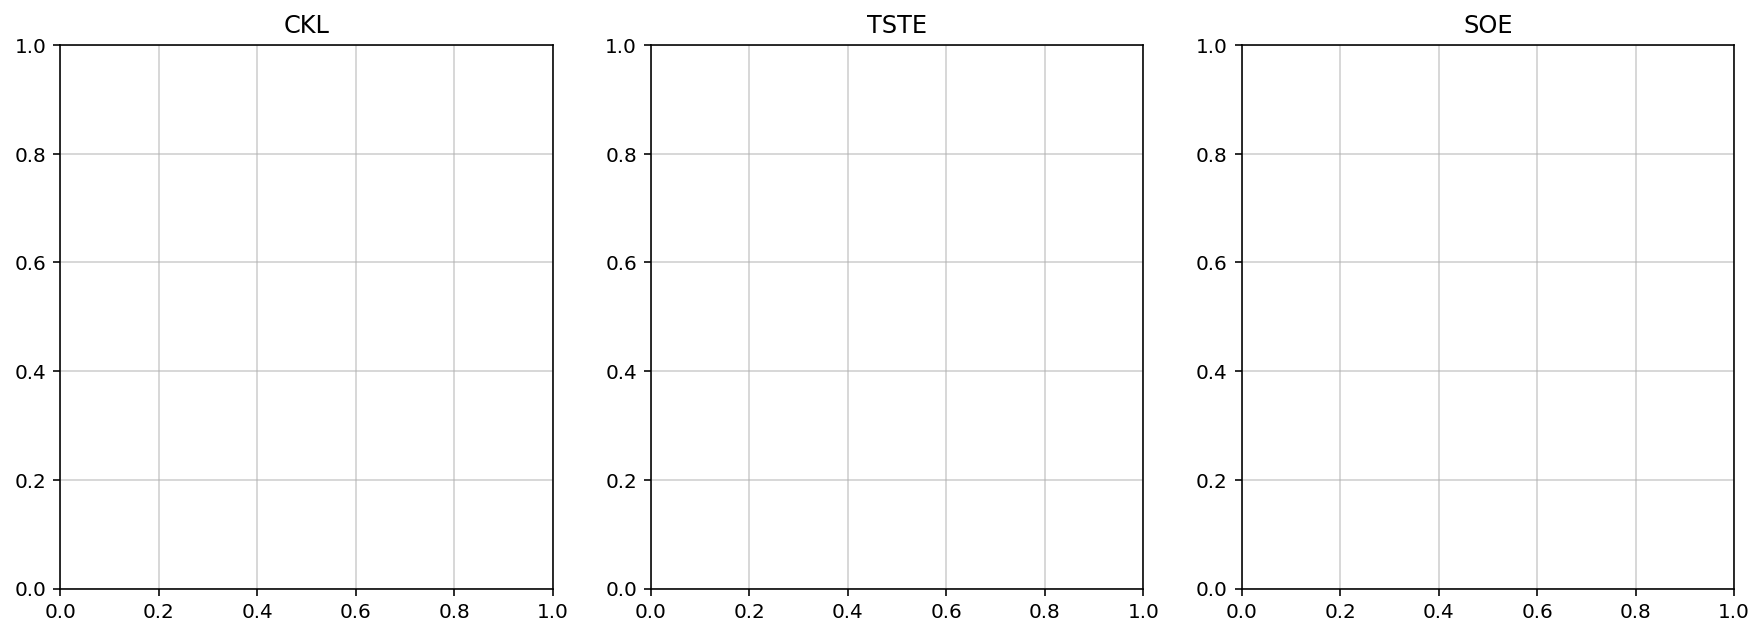

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

w = 5
fig, axs = plt.subplots(ncols=3, figsize=(3 * w, w))
cmap = cm.viridis

hue_order = list(sorted({m["meta"]["n_top"] for m in out}))
# print(hue_order)
for ax, nm in zip(axs, ["CKL", "TSTE", "SOE"]):
    __show = [o for o in out if o["meta"]["noise_model"] == nm]
    _ = ax.set_title(nm)
    for k, m in enumerate(__show):
        if m["meta"]["n_top"] not in hue_order:
            continue
        ax = sns.lineplot(
            x="_epochs",
            y="stats__nn_diff_mean",
            data=pd.DataFrame(m["history"]),
            ax=ax,
            color=cmap(k / (max(1, len(hue_order) - 1))),
            label=m["meta"]["n_top"],
        )
        from pprint import pprint
#         pprint(m["meta"])
#     ax.set_ylim(0.80, 0.84)
    ax.grid(alpha=0.6)
    ax.set_xlim(0, None)


In [7]:
__ds = [m for m in out if m["meta"]["noise_model"] == "CKL" and m["meta"]["n_top"] == 1]
assert len(__ds) == 1, len(__ds)
__d = __ds[0]

AssertionError: 0

In [8]:
import altair as alt
import numpy as np
__e = pd.DataFrame(__d["embedding"])
__e.columns = ["x", "y"]
__e["smoothness"] = np.arange(len(__e))
alt.Chart(__e).mark_circle(size=100).encode(
    x="x",
    y="y",
    color="smoothness",
)

NameError: name '__d' is not defined